In [5]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Confusion Matrix:
[[33069     0]
 [   13     5]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33069
         1.0       1.00      0.28      0.43        18

    accuracy                           1.00     33087
   macro avg       1.00      0.64      0.72     33087
weighted avg       1.00      1.00      1.00     33087

Accuracy: 0.9996373197932723
Precision: 1.0
Recall: 0.3333333333333333
F1-Score: 0.5


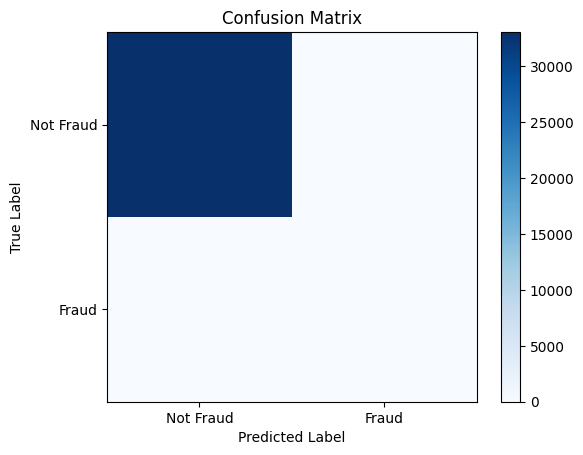

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

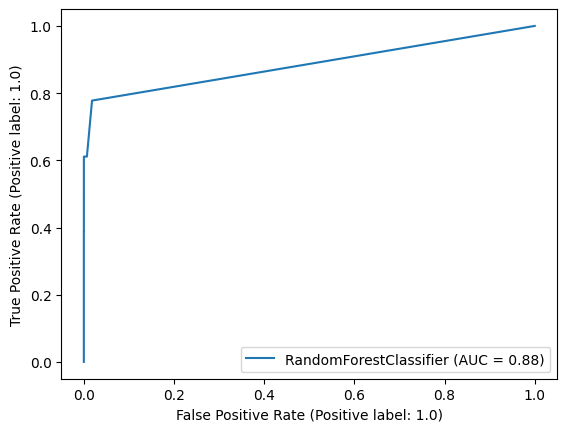

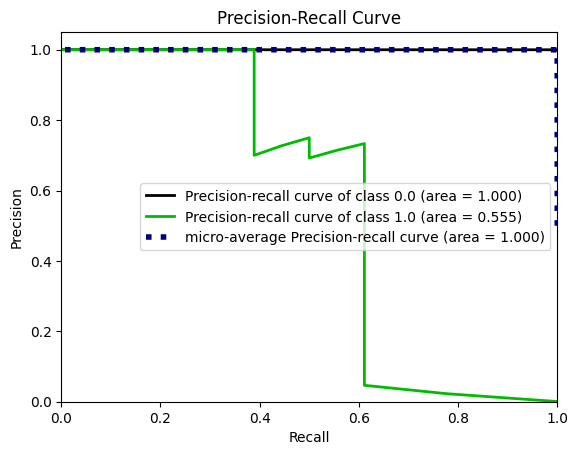

In [8]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Fraud.csv')

# Convert categorical variables into numerical variables
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
df['type'] = ordinal_enc.fit_transform(df[['type']])
df['nameOrig'] = ordinal_enc.fit_transform(df[['nameOrig']])
df['nameDest'] = ordinal_enc.fit_transform(df[['nameDest']])

# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(X_train[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
X_val[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.transform(X_val[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])

from sklearn.ensemble import RandomForestClassifier

# Drop rows with NaN values in validation data
X_val = X_val.dropna()
y_val = y_val[X_val.index]

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = rf.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
#from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))

print('Classification Report:')
print(classification_report(y_val, y_pred))

# Build the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred = rf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))

# calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(['Not Fraud', 'Fraud']))
plt.xticks(tick_marks, ['Not Fraud', 'Fraud'])
plt.yticks(tick_marks, ['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC Recall Curve
RocCurveDisplay.from_estimator(rf, X_val, y_val)

# Plot the Precision-Recall Curve

skplt.metrics.plot_precision_recall(y_val, rf.predict_proba(X_val))
